# 자연어 처리


* 파이썬의 유명한 자연어 처리 패키지 NLTK를 활용하면 문서 안의 내용을 빠르게 탐색하거나 요약할 수 있고 토픽 모델링을 지원하는 패키지 Gensim 을 사용하면 여러 문장이나 문서에 내재되어있는 규칙성을 발견할 수 있다.

* KoNLPy(코앤엘파이)  <br>
    한국어 자연어처리를 위한 대표적인 파이썬 라이브러리
    
* NLTK(Natural Language ToolKit <br>
    * 영어 처리를 위한 대표적 파이썬 자연어처리 라이브러리
    * Natural Language Toolkit 또는 더 일반적으로 NLTK는 Python 프로그래밍 언어로 작성된 영어의 기호 및 통계적 자연어 처리를 위한 라이브러리 및 프로그램 모음입니다. 분류, 토큰화, 형태소 분석, 태그 지정, 구문 분석 및 의미론적 추론 기능을 지원합니다


* 참고자료 <br>
    http://kkma.snu.ac.kr/documents/?doc=postag
    https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html
    https://aileen93.tistory.com/tag/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D
    https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/#konlpy.tag._twitter.Twitter

## 1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치
* KoNLPy 패키지 설치
    * 1. JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * 2. KoNLPy 의존성 패키지 설치하기
        - **pip install jpype1**
    * 3. KoNLPy 설치
        - **pip install konlpy**
    * 4.  (C:\Users\A\Anaconda3) C:\Users\A\Anaconda3>python
        >>> import nltk
        >>> nltk.download()
        --> stopwords & punkt duble click download
    * 5. 워드 클라우드
            - pip install wordcloud
     * 6. gensim 설치
             - pip install gensim

## 2. 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma     # 꼬꼬마 사전
kkma = Kkma()

In [5]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요')   #문장단위

['한국어 분석을 시작합니다', '재미있어요']

In [6]:
kkma.nouns('한국어 분석을 시작합니다')    #명사단위

['한국어', '분석']

In [7]:
# POS(Part Of Speech) 형태소 품사
kkma.pos('한국어 분석을 시작합니다 재미있어요')    #형태소단위

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN')]

In [8]:
from konlpy.tag import Hannanum     # Hannanum 사전. 사전마다 성능이 다르다.
hannanum = Hannanum()

In [10]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요')

['한국어', '분석', '시작']

In [11]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요')    # 말뭉치

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요']

In [12]:
# pos: 형태소 분석
hannanum.pos('한국어 분석을 시작합니다 재미있어요')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E')]

In [15]:
# 트위터 분석
from konlpy.tag import Okt
t = Okt()

In [16]:
t.nouns('한국어 분석을 시작합니다 재미있어요')

['한국어', '분석', '시작']

In [18]:
t.morphs('한국어 분석을 시작합니다 재미있어요')

['한국어', '분석', '을', '시작', '합니다', '재미있어요']

In [19]:
t.pos('한국어 분석을 시작합니다 재미있어요')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective')]

## 3. 워드 클라우드(word cloud)
* WordCloud 설치: pip install wordcloud
* PIL(Python Imaging Library)

In [22]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image     # 이미지를 처리하는 라이브러리 import

In [24]:
text = open('../data/python_data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/python_data/09. alice_mask.png'))  
stopwords = set(STOPWORDS)
stopwords.add('said')   # said 라는 단어를 불용어(stopwords) 처리한다

In [26]:
import matplotlib.pyplot as plt
import platform
path = 'C:\Windows\Fonts\malgun.ttf'

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...')

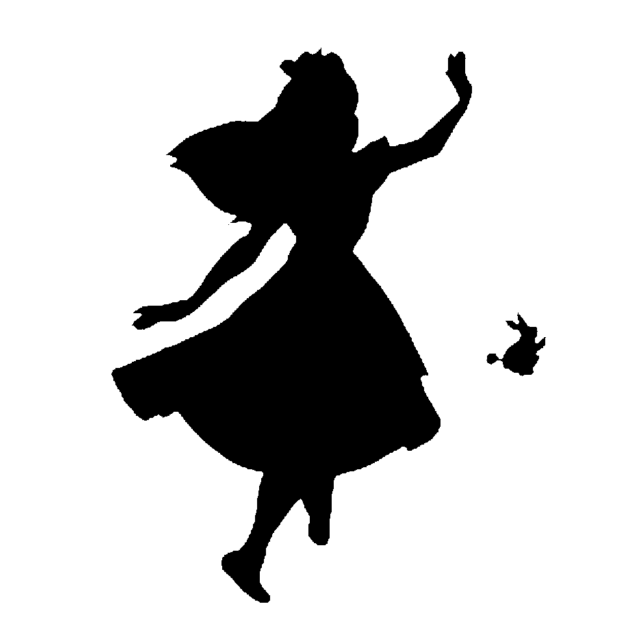

In [30]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')   #Reds
plt.axis('off')
plt.show()

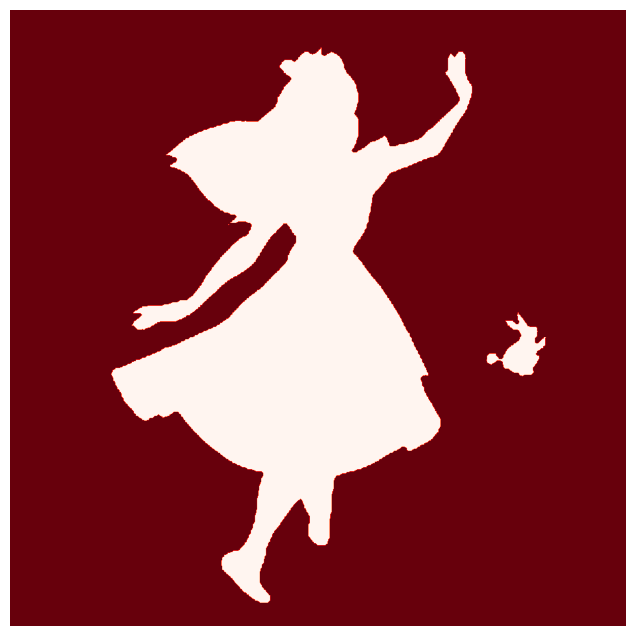

In [33]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap = plt.cm.Reds, interpolation = 'bilinear')   #gray
plt.axis('off')     # on
plt.show()

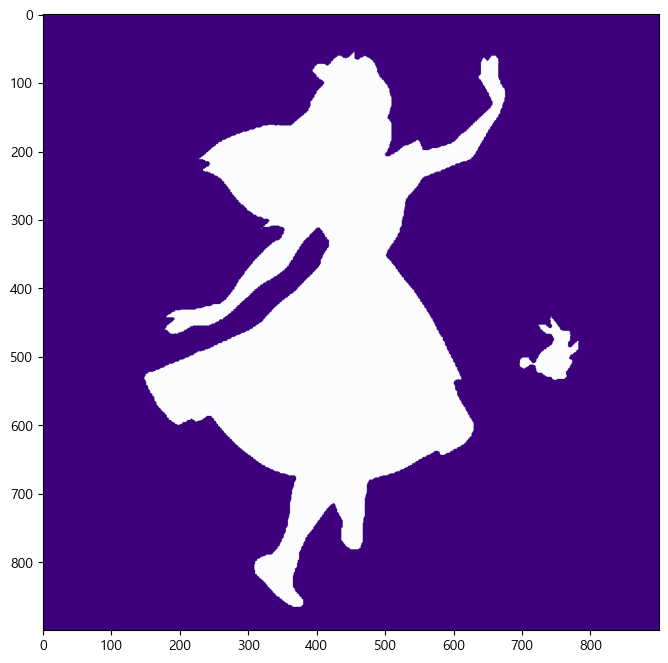

In [39]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap = plt.cm.Purples, interpolation = 'bilinear')   #Reds  #Purples
plt.axis('on')
plt.show()

In [37]:
wc = WordCloud(background_color = 'white', max_words = 2000,    #최대 2000단어
              mask = alice_mask, stopwords = stopwords)
wc = wc.generate(text)   # 앨리스라는 문서에서 단어를 뽑아온다
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

### 참고자료 (선형보간법)
* https://blog.naver.com/aorigin/220947541918
* https://darkpgmr.tistory.com/117

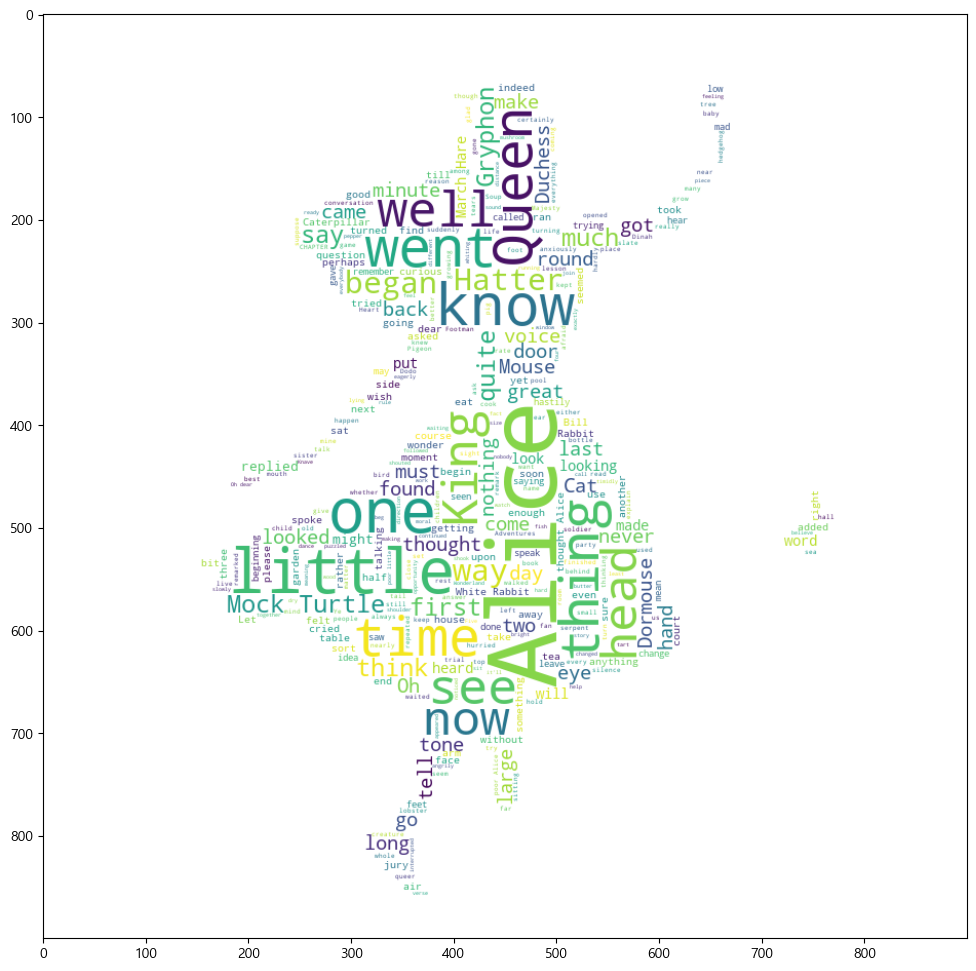

In [40]:
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')   # 그림이 겹쳐보이지 않게
#interpolation(보간법) bilinear는 1차원의 선형보간법(linear interpolation)을 2차원에 적용한다는 뜻. 
plt.axis('on')
plt.show()

In [53]:
text = open('../data/python_data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('../data/python_data/09. stormtrooper_mask.png'))

In [54]:
stopwords = set(STOPWORDS)
stopwords.add('int')   # 불용어 추가
stopwords.add('ext')

In [55]:
wc1 = WordCloud(max_words = 1000, mask = mask, stopwords = stopwords, margin = 10, random_state = 1). generate(text)

default_colors = wc1.to_array()

In [56]:
wc1.words_

{'Luke': 1.0,
 'Han': 0.45121951219512196,
 'DEATH STAR': 0.3902439024390244,
 'THREEPIO': 0.36585365853658536,
 'Ben': 0.2665505226480836,
 'Leia': 0.19686411149825783,
 'ship': 0.19686411149825783,
 'Artoo': 0.17247386759581881,
 'one': 0.1672473867595819,
 'X WING': 0.16550522648083624,
 'look': 0.1602787456445993,
 'RED LEADER': 0.15505226480836237,
 'back': 0.14285714285714285,
 'move': 0.13588850174216027,
 'two': 0.13414634146341464,
 'toward': 0.1289198606271777,
 'going': 0.12717770034843207,
 'Biggs': 0.12020905923344948,
 'TIE fighter': 0.11846689895470383,
 'see': 0.11672473867595819,
 'Vader': 0.11498257839721254,
 'MILLENNIUM FALCON': 0.11149825783972125,
 'SPACE': 0.10975609756097561,
 'surface': 0.10801393728222997,
 'right': 0.10801393728222997,
 'Luke X': 0.10801393728222997,
 'come': 0.10627177700348432,
 'around': 0.10452961672473868,
 'trooper': 0.10452961672473868,
 'robot': 0.09930313588850175,
 'small': 0.0975609756097561,
 'side': 0.09581881533101046,
 'head': 

In [61]:
print(wc1.words_)
print(stopwords)

{'Luke': 1.0, 'Han': 0.45121951219512196, 'DEATH STAR': 0.3902439024390244, 'THREEPIO': 0.36585365853658536, 'Ben': 0.2665505226480836, 'Leia': 0.19686411149825783, 'ship': 0.19686411149825783, 'Artoo': 0.17247386759581881, 'one': 0.1672473867595819, 'X WING': 0.16550522648083624, 'look': 0.1602787456445993, 'RED LEADER': 0.15505226480836237, 'back': 0.14285714285714285, 'move': 0.13588850174216027, 'two': 0.13414634146341464, 'toward': 0.1289198606271777, 'going': 0.12717770034843207, 'Biggs': 0.12020905923344948, 'TIE fighter': 0.11846689895470383, 'see': 0.11672473867595819, 'Vader': 0.11498257839721254, 'MILLENNIUM FALCON': 0.11149825783972125, 'SPACE': 0.10975609756097561, 'surface': 0.10801393728222997, 'right': 0.10801393728222997, 'Luke X': 0.10801393728222997, 'come': 0.10627177700348432, 'around': 0.10452961672473868, 'trooper': 0.10452961672473868, 'robot': 0.09930313588850175, 'small': 0.0975609756097561, 'side': 0.09581881533101046, 'head': 0.09581881533101046, 'make': 0.0

In [57]:
import random
def grey_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return 'hsl(0, 0%%, %d%% )' % random.randint(60, 100)  #hsl: 색상, 채도, 명도

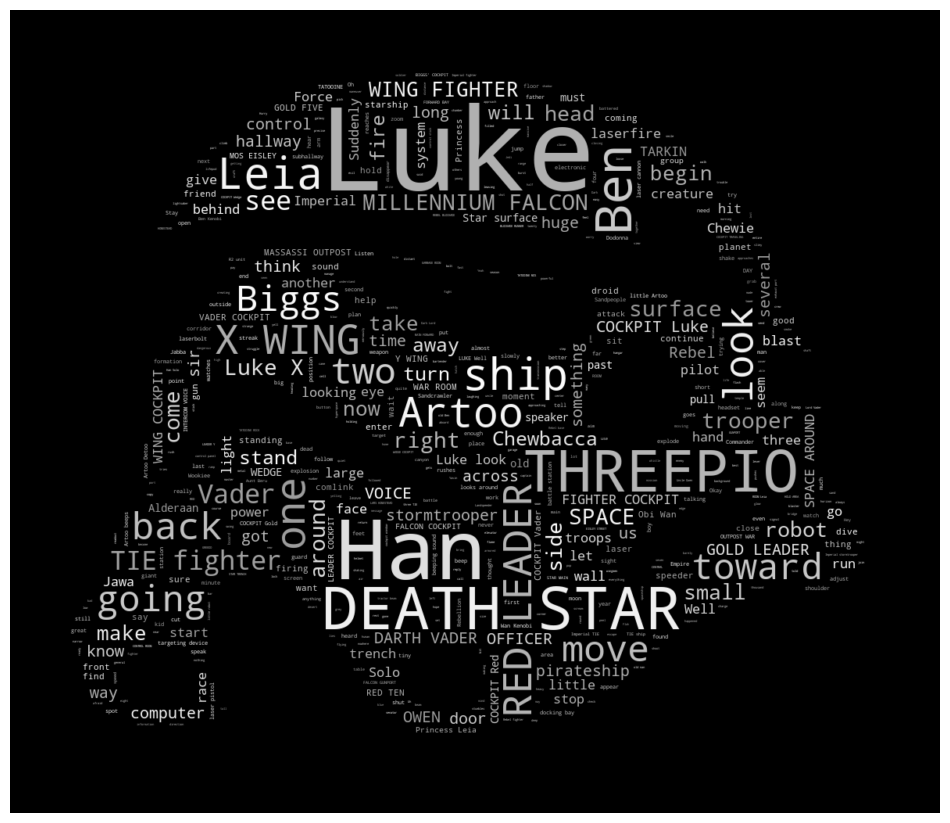

In [60]:
plt.figure(figsize = (12,12))
plt.imshow(wc1.recolor(color_func = grey_color_func, random_state = 3), interpolation = 'bilinear')   # 그림이 겹쳐보이지 않게
plt.axis('off')
plt.show()

### 참고자료( color_func )
* https://wannabe00.tistory.com/entry/Word-cloud-%EC%9B%90%ED%95%98%EB%8A%94-%EC%83%89%EC%9C%BC%EB%A1%9C-%EA%BE%B8%EB%AF%B8%EA%B8%B0-word-cloud-customize-color

# 육아휴직 관련 법안 1809890호

In [62]:
import nltk

In [65]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
print(files_ko)

['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']


In [66]:
doc_ko = kobill.open('1809890.txt').read()

In [67]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [73]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [70]:
ko = nltk.Text(tokens_ko)

In [71]:
print(len(ko.tokens))          # 수집된 단어의 개수
print(len(set(ko.tokens)))     # 고유한 횟수
ko.vocab()                     # 단어의 빈도수

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

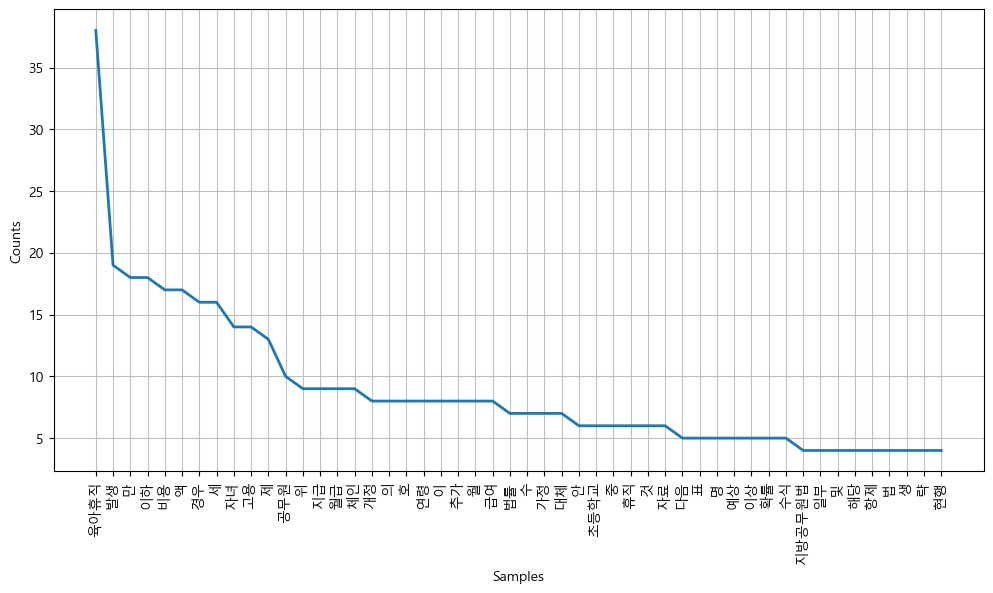

In [74]:
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()   # 불용어를 처리해야할 필요가 있다. 

In [76]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×',
              '의','자','에','안','번','호','을','이','다','만',
              '로','가','를','발','인','액','수','세','중','제','월','곳',
             '위','이하','것','표','명', '및']

ko = [each_word for each_word in ko if each_word not in stop_words ]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '제안',
 '이유',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '자녀',
 '나이',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '개정',
 '것임',
 '항제',
 '법률',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '항제',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '현',
 '행',
 '개',
 '정',
 '휴직',
 '생',
 '략',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '다만',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '생',
 '략',
 '현행',
 '초등학교',
 '취',
 '취학',
 '중인',
 '경우',
 '학',
 '전',
 '자녀',
 '양육',
 '초등학교',
 '학년',
 '여',
 '여자',
 '공무원',
 '말',
 '자녀',
 '임신',
 '출산',
 '때',
 '생',
 '략',
 '생',
 '략',
 '현행',


In [77]:
stop_words

['.',
 '(',
 ')',
 ',',
 "'",
 '%',
 '-',
 'X',
 ').',
 '×',
 '의',
 '자',
 '에',
 '안',
 '번',
 '호',
 '을',
 '이',
 '다',
 '만',
 '로',
 '가',
 '를',
 '발',
 '인',
 '액',
 '수',
 '세',
 '중',
 '제',
 '월',
 '곳',
 '위',
 '이하',
 '것',
 '표',
 '명',
 '및']

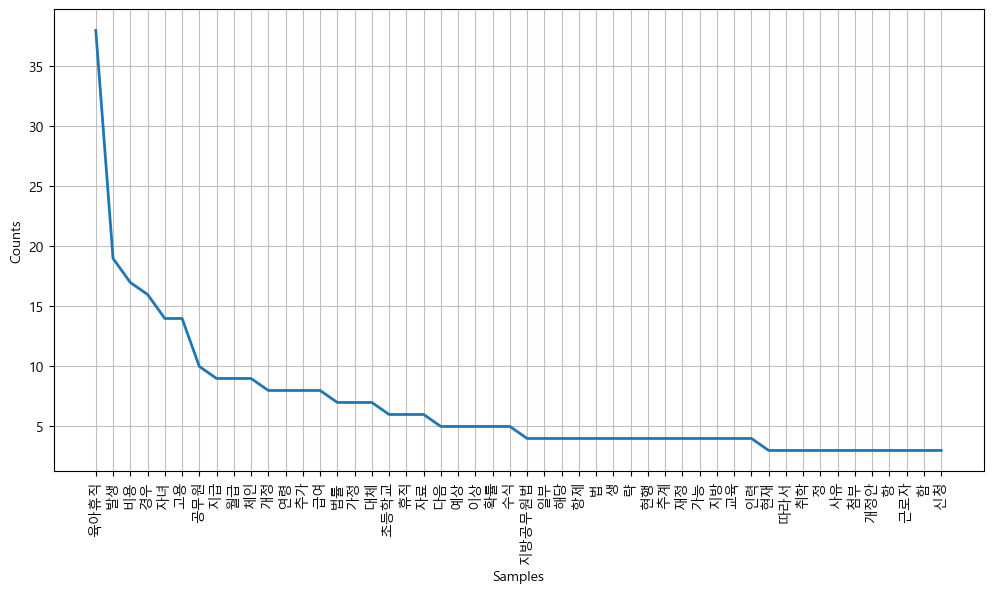

In [79]:
ko = nltk.Text(ko)
plt.figure(figsize = (12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [80]:
ko.count('초등학교')

6

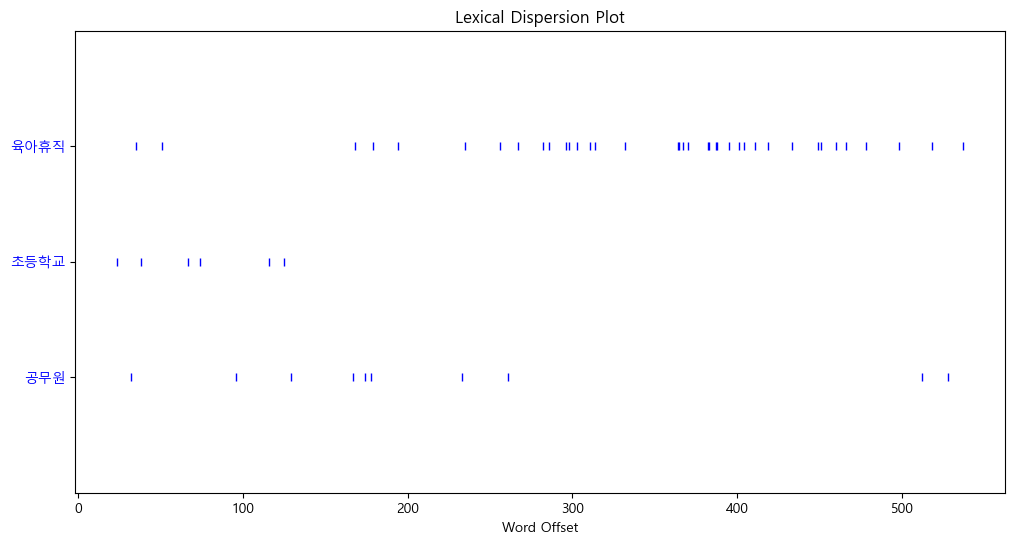

In [81]:
# 단어의 문장내 위치
plt.figure(figsize = (12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])     #

In [82]:
# 초등학교 주변 단어를 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 여상규 안규백 황영철 박영아 김정훈 김학송 의원 제안 이유 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 자녀 나이 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 것임 따
률 지방공무원법 일부 개정 법률 지방공무원법 일부 다음 개정 항제 초등학교 취학 전 자녀 취학 중인 경우 초등학교 학년 말 자녀 부 칙 법 
원법 일부 다음 개정 항제 초등학교 취학 전 자녀 취학 중인 경우 초등학교 학년 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 현 행 개
 사유 직 임용 휴직 다만 경우 대통령령 정 사정 직 생 략 현행 초등학교 취 취학 중인 경우 학 전 자녀 양육 초등학교 학년 여 여자 공무
정 직 생 략 현행 초등학교 취 취학 중인 경우 학 전 자녀 양육 초등학교 학년 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 현행 


In [83]:
# 문장 내에서 연이어 나타난 단어. version에 따라실행안될수도있음
ko.collocation_list()

[('초등학교', '저학년'),
 ('공무원', '근로자'),
 ('근로자', '육아휴직'),
 ('대상자', '육아휴직'),
 ('육아휴직', '대상자'),
 ('공무원', '육아휴직'),
 ('육아휴직', '육아휴직')]

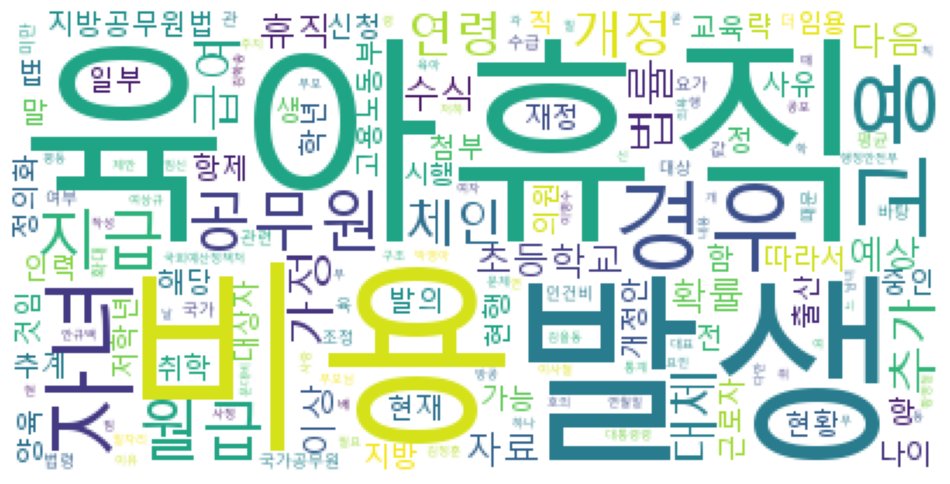

In [98]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',
                      relative_scaling = 0.1, 
                      background_color = 'white'
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

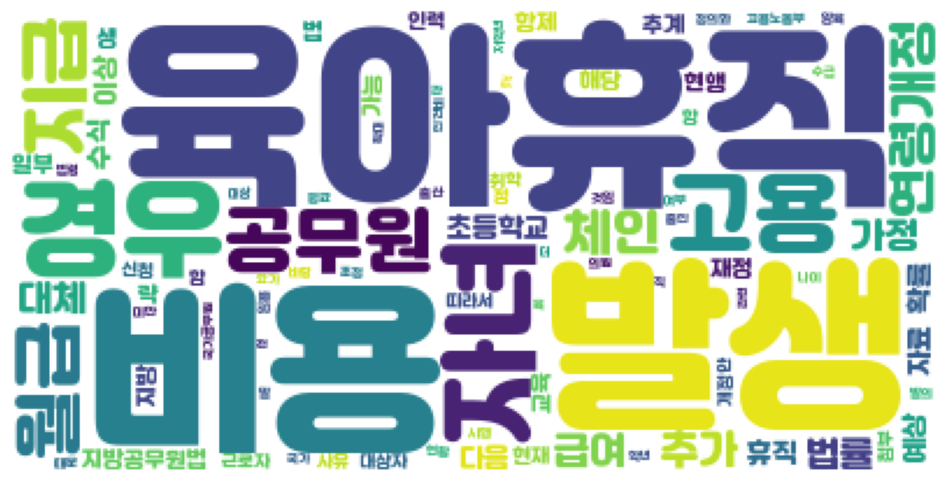

In [96]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path = '../data/python_data/Jalnan.ttf', 
                      relative_scaling = 0.1, 
                      background_color = 'white'
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [94]:
mask1 = np.array(Image.open('../img/pan.png'))     #이미지파일은 흑백이어야함

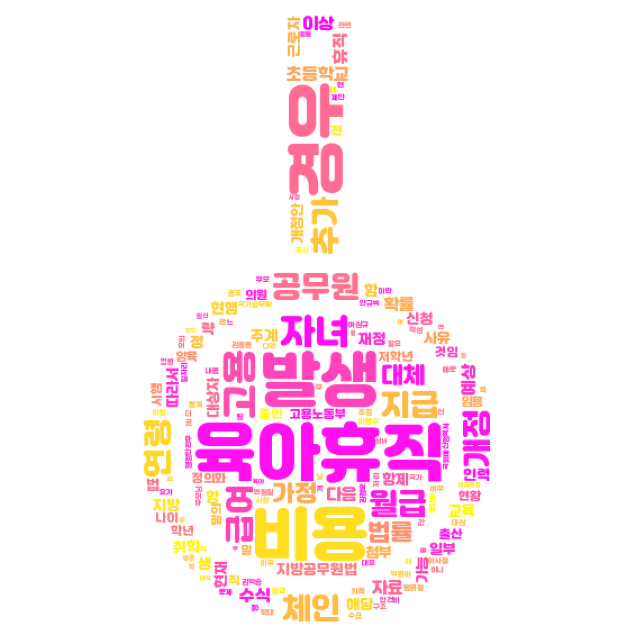

In [104]:
data= ko.vocab().most_common(150)
wordcloud = WordCloud(font_path = '../data/python_data/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap='spring',    # spring, summer, seismic etc
                     mask=mask1
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [101]:
mask2 = np.array(Image.open('../img/wine.PNG'))

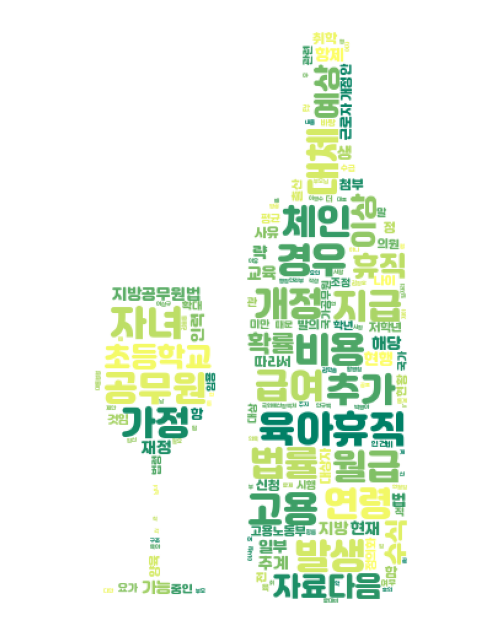

In [102]:
data= ko.vocab().most_common(150)
wordcloud = WordCloud(font_path = '../data/python_data/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap='summer',
                     mask=mask2
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 5. Naive Bayes Classifier 의 이해 - 영문

In [106]:
from nltk.tokenize import word_tokenize
import nltk 

In [107]:
# 지도학습, 비지도학습 - 지도학습 예로 생각
# 훈련세트 4개 문장에 라벨링 - 긍정, 부정
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [109]:
train[0]

('i like you', 'pos')

In [108]:
for i in train:
    for j in word_tokenize(i[0]):
        print(j.lower())

i
like
you
i
hate
you
you
like
me
i
like
her


In [110]:
a = (train[0])
a

('i like you', 'pos')

In [111]:
print(word_tokenize(train[0][0]))

['i', 'like', 'you']


In [113]:
# 말뭉치
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [114]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1] ) for x in train]      # x[1] 은 pos,neg 표시
t     # train 데이터에 말뭉치(all_words)의 단어가 있는지 없는지

[({'like': True,
   'i': True,
   'hate': False,
   'you': True,
   'me': False,
   'her': False},
  'pos'),
 ({'like': False,
   'i': True,
   'hate': True,
   'you': True,
   'me': False,
   'her': False},
  'neg'),
 ({'like': True,
   'i': False,
   'hate': False,
   'you': True,
   'me': True,
   'her': False},
  'neg'),
 ({'like': True,
   'i': True,
   'hate': False,
   'you': False,
   'me': False,
   'her': True},
  'pos')]

In [121]:
{word: (word in word_tokenize(a[0])) for word in all_words}

{'like': True,
 'i': True,
 'hate': False,
 'you': True,
 'me': False,
 'her': False}

In [122]:
# 결과 해석하는 방법
# hate가 false일때 pos:neg는 1.7:1.0
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()    

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [123]:
test_sentence = 'i like MeRui'      # train셋을 기반으로 test한다. 훈련셋을 기반으로 시험셋문장을 긍정문인지 부정문인지 판단
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'like': True,
 'i': True,
 'hate': False,
 'you': False,
 'me': False,
 'her': False}

In [124]:
classifier.classify(test_sent_features)   # test_sentence = 'i like MeRui' 가 긍정문이라고 답변 줌

'pos'

### 8-6. Naive Bayes Classifier 의 이해 - 한글 
* https://github.com/e9t/nsmc/

In [125]:
from konlpy.tag import Twitter

In [126]:
pos_tagger = Twitter()

C:\Users\lenovo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [128]:
# 지도학습 - 학습세트의 문장이 긍정(pos), 부정(neg) 라벨링 되어 있음
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos')]

In [129]:
#말뭉치
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [130]:
# 말뭉치에 있는지 여부를 나타냄(5개의 훈련 세트)
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1] ) for x in train]      # x[1] 은 pos,neg 표시
t     # train 데이터에 말뭉치(all_words)의 단어가 있는지 없는지

[({'메리가': True,
   '이쁜': False,
   '고양이야': False,
   '놀거야': False,
   '메리랑': False,
   '지루해': False,
   '좋아': True,
   '마치고': False,
   '고양이도': False,
   '난': False,
   '메리는': False,
   '수업이': False},
  'pos'),
 ({'메리가': False,
   '이쁜': False,
   '고양이야': False,
   '놀거야': False,
   '메리랑': False,
   '지루해': False,
   '좋아': True,
   '마치고': False,
   '고양이도': True,
   '난': False,
   '메리는': False,
   '수업이': False},
  'pos'),
 ({'메리가': False,
   '이쁜': False,
   '고양이야': False,
   '놀거야': False,
   '메리랑': False,
   '지루해': True,
   '좋아': False,
   '마치고': False,
   '고양이도': False,
   '난': True,
   '메리는': False,
   '수업이': True},
  'neg'),
 ({'메리가': False,
   '이쁜': True,
   '고양이야': True,
   '놀거야': False,
   '메리랑': False,
   '지루해': False,
   '좋아': False,
   '마치고': False,
   '고양이도': False,
   '난': False,
   '메리는': True,
   '수업이': False},
  'pos'),
 ({'메리가': False,
   '이쁜': False,
   '고양이야': False,
   '놀거야': True,
   '메리랑': True,
   '지루해': False,
   '좋아': False,
   '마치고': True,
   '고양이도': False,
   '난': 

In [131]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()   

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [145]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [146]:
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'메리가': False,
 '이쁜': False,
 '고양이야': False,
 '놀거야': True,
 '메리랑': True,
 '지루해': False,
 '좋아': False,
 '마치고': False,
 '고양이도': False,
 '난': True,
 '메리는': False,
 '수업이': True}

In [149]:
# stem = True: 원형,    norm = True : 정규화(normalize)
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm = True, stem = True)]

In [150]:
for row in train:
    print(tokenize( row[0] ))

['메리/Noun', '가/Josa', '좋다/Adjective']
['고양이/Noun', '도/Josa', '좋다/Adjective']
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective']
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa']
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb']


In [151]:
from konlpy.tag import Twitter
twitter = Twitter()
print(twitter.pos('이것도 재미 있습니당ㅋㅋ'))
print('--------------------------------------------------------------------')
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm=True))
print('--------------------------------------------------------------------')
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm=True, stem=True))

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있', 'Adjective'), ('습', 'Noun'), ('니당', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
--------------------------------------------------------------------
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있습니다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]
--------------------------------------------------------------------
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]


C:\Users\lenovo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [152]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [153]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [154]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [155]:
for d, c in train_docs:
    print(d, c)

['메리/Noun', '가/Josa', '좋다/Adjective'] pos
['고양이/Noun', '도/Josa', '좋다/Adjective'] pos
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'] neg
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'] pos
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'] pos


In [156]:
#'메리가 좋아', '고양이도 좋아'
# 토큰라이징한 후문장이 말뭉치에 있는지 확인
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [157]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [158]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

In [161]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [162]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

* 영어와 다르게 한국어는 토큰화하고 정규화까지 해야 제대로된 데이터가 나온다. <br>정규화하고 나서 부정문이 긍정문이 되었다.